In [1]:
import brainpy as bp
import brainpy.math as bm
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.linalg import eig

import sys
sys.path.append('..')
from cann import CANN1D

/home/zilong/anaconda3/envs/hippocampalsequence/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
N = 100
replay_cann = CANN1D(tau=1., tau_v=48., num=N, mbar=1.5)

array([[5.10646105, 5.04384947, 4.86058378, ..., 4.5698185 , 4.86058378,
        5.04384947],
       [5.04384947, 5.10646105, 5.04384947, ..., 4.19173336, 4.5698185 ,
        4.86058378],
       [4.86058378, 5.04384947, 5.10646105, ..., 3.75122046, 4.19173336,
        4.5698185 ],
       ...,
       [4.5698185 , 4.19173336, 3.75122046, ..., 5.10646105, 5.04384947,
        4.86058378],
       [4.86058378, 4.5698185 , 4.19173336, ..., 5.04384947, 5.10646105,
        5.04384947],
       [5.04384947, 4.86058378, 4.5698185 , ..., 4.86058378, 5.04384947,
        5.10646105]])

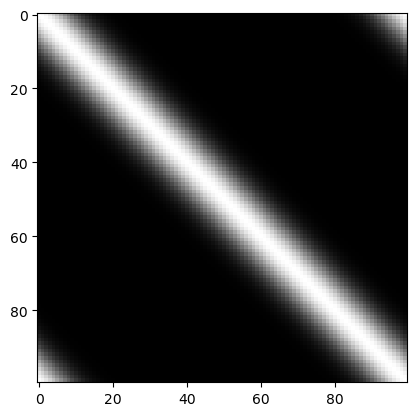

In [3]:
weight_mat = np.zeros((N, N))
for i in range(N):
    weight_vec = replay_cann.make_conn_i(i)
    weight_mat[i,:] = weight_vec

plt.imshow(weight_mat, cmap='gray')

weight_mat

In [4]:
# egendecomposition of weight matrix using scipy
from scipy.linalg import eig
evals, evecs_l, evecs_r = eig(weight_mat, left=True, right=True)

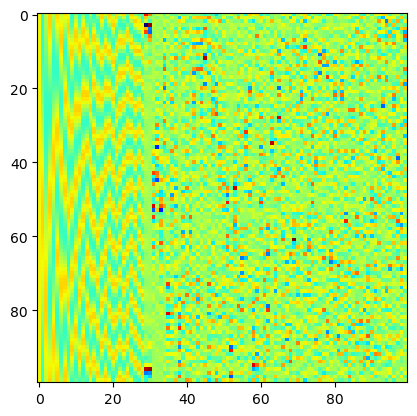

In [5]:
plt.imshow(evecs_l, cmap='jet')

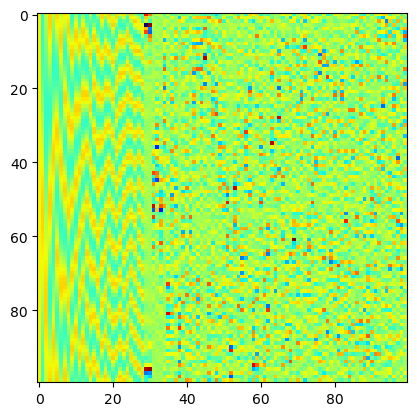

In [6]:
plt.imshow(evecs_r, cmap='jet')

In [7]:
#print real part of evals
print(evals.real)

[ 8.14873281e+01  7.52222860e+01  7.52222832e+01  5.91719485e+01
  5.91719412e+01  3.96641416e+01  3.96641398e+01  2.26565193e+01
  2.26565135e+01  1.10281093e+01  1.10281112e+01  4.57427124e+00
  4.57427203e+00  1.61679735e+00  1.61679850e+00  4.86970271e-01
  4.86970776e-01  1.24986314e-01  1.24986931e-01  2.73361680e-02
  2.73366670e-02  5.09488581e-03  5.09522082e-03  8.09313254e-04
  8.09183717e-04  1.09202670e-04  1.09407815e-04  1.21864534e-05
  1.20452603e-05  3.51263644e-06 -2.76984261e-06  1.67066273e-06
  1.30962275e-06 -1.40783055e-06 -1.34579530e-06  1.21326678e-06
  1.14160738e-06 -1.21464898e-06 -1.20011736e-06 -1.11889260e-06
 -9.80831793e-07 -1.01791507e-06  1.07670728e-06  1.04794427e-06
  1.03121317e-06  1.00106702e-06 -8.93453720e-07 -8.56181578e-07
 -8.37791736e-07 -7.89255314e-07 -8.05851059e-07  9.19818097e-07
  8.52533505e-07  8.36471793e-07 -6.92040400e-07 -6.45030722e-07
 -6.23986477e-07 -5.93800741e-07  8.06335189e-07 -5.35200186e-07
 -5.07137518e-07  7.82903

In [8]:
#sbtract a digonal matrix from weight matrix with digonal values equal to x
x = 1
new_weight_mat = weight_mat - x*np.eye(N)
#calculate the eigenvalues of the new matrix
new_evals, new_evecs_l, new_evecs_r = eig(new_weight_mat, left=True, right=True)

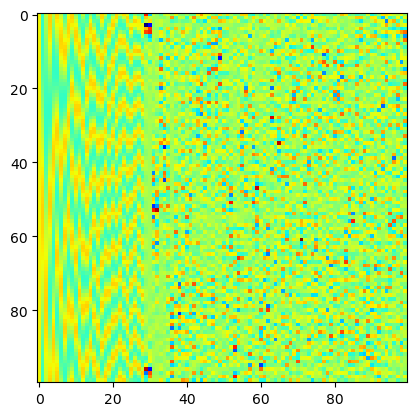

In [9]:
plt.imshow(new_evecs_l, cmap='jet')

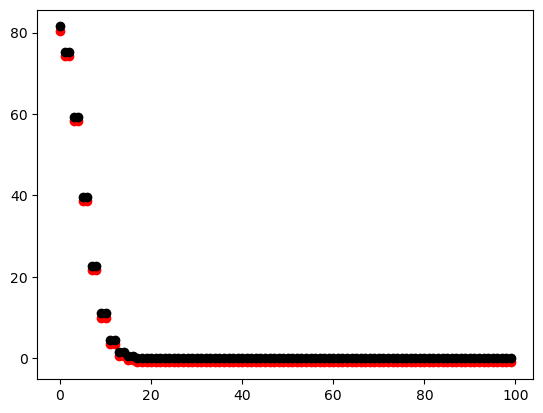

In [10]:
#plot the real part of the eigenvalues
plt.plot(new_evals.real, 'ro')
plt.plot(evals.real, 'ko')

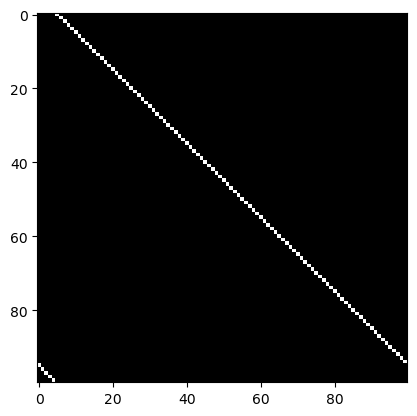

In [11]:
#generate a circular matrix with diagonal values equal to x, other values are zero

def get_circular_mat(N, epsilon, offset):
    circular_mat = np.zeros((N, N))
    for i in range(N):
        if i+offset < N:
            circular_mat[i, i+offset] = epsilon
        else:
            circular_mat[i, i+offset-N] = epsilon
    return circular_mat

circular_mat = get_circular_mat(N, 1, 5)
plt.imshow(circular_mat, cmap='gray')


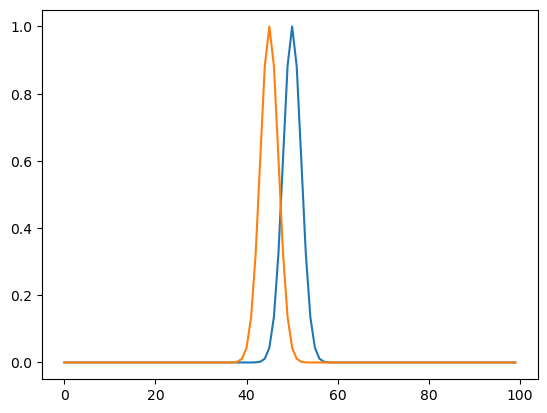

In [12]:
#generate a Gaussian bump with N neurons center at position 10
def get_gaussian_bump(N, center, sigma):
    bump = np.zeros(N)
    for i in range(N):
        bump[i] = np.exp(-((i-center)**2)/(2*sigma**2))
    return bump

plt.plot(get_gaussian_bump(N, 50, 2))

#shift the bump to the left by the circular matrix
shifted_bump = np.dot(circular_mat, get_gaussian_bump(N, 50, 2))
plt.plot(shifted_bump)

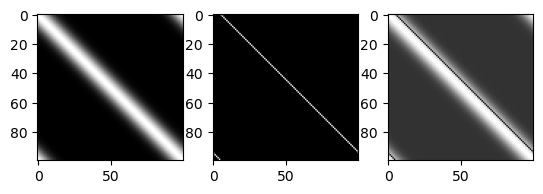

In [18]:
#subtract the weight_mat by the circular matrix
circular_mat = get_circular_mat(N, 5, 5)
asym_weight_mat = weight_mat - circular_mat
fig, axs = plt.subplots(1, 3)
axs[0].imshow(weight_mat, cmap='gray')
axs[1].imshow(circular_mat, cmap='gray')
axs[2].imshow(asym_weight_mat, cmap='gray')

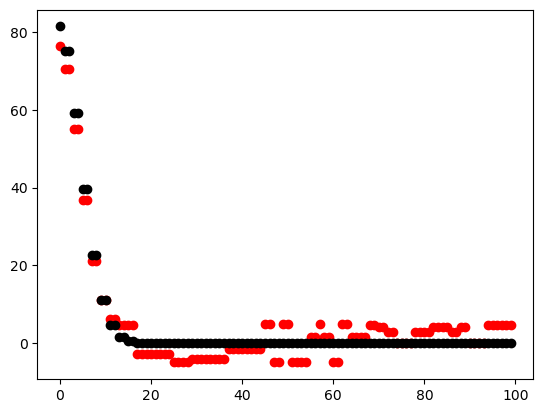

In [14]:
#get the eigenvalues of the asym_weight_mat
asym_eigvals, asym_evecs_l, asym_evecs_r = eig(asym_weight_mat, left=True, right=True)
fig, ax = plt.subplots(1, 1)
ax.plot(asym_eigvals.real, 'ro')
ax.plot(evals.real, 'ko')

In [19]:
evals, evecs_l, evecs_r = eig(weight_mat, left=True, right=True)

circular_mat = get_circular_mat(N, 10, k=40)
asym_weight_mat = weight_mat - circular_mat
asym_eigvals, asym_evecs_l, asym_evecs_r = eig(asym_weight_mat, left=True, right=True)

M = 10

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].plot(np.abs(asym_eigvals)[:M], 'ro')
ax[0].plot(np.abs(evals)[:M], 'ko')
ax[0].legend(['asym', 'original'])

ax[1].plot(np.abs(asym_eigvals)[:M] / np.abs(evals)[:M], 'o')

TypeError: get_circular_mat() got an unexpected keyword argument 'k'

TypeError: get_circular_mat() got an unexpected keyword argument 'k'

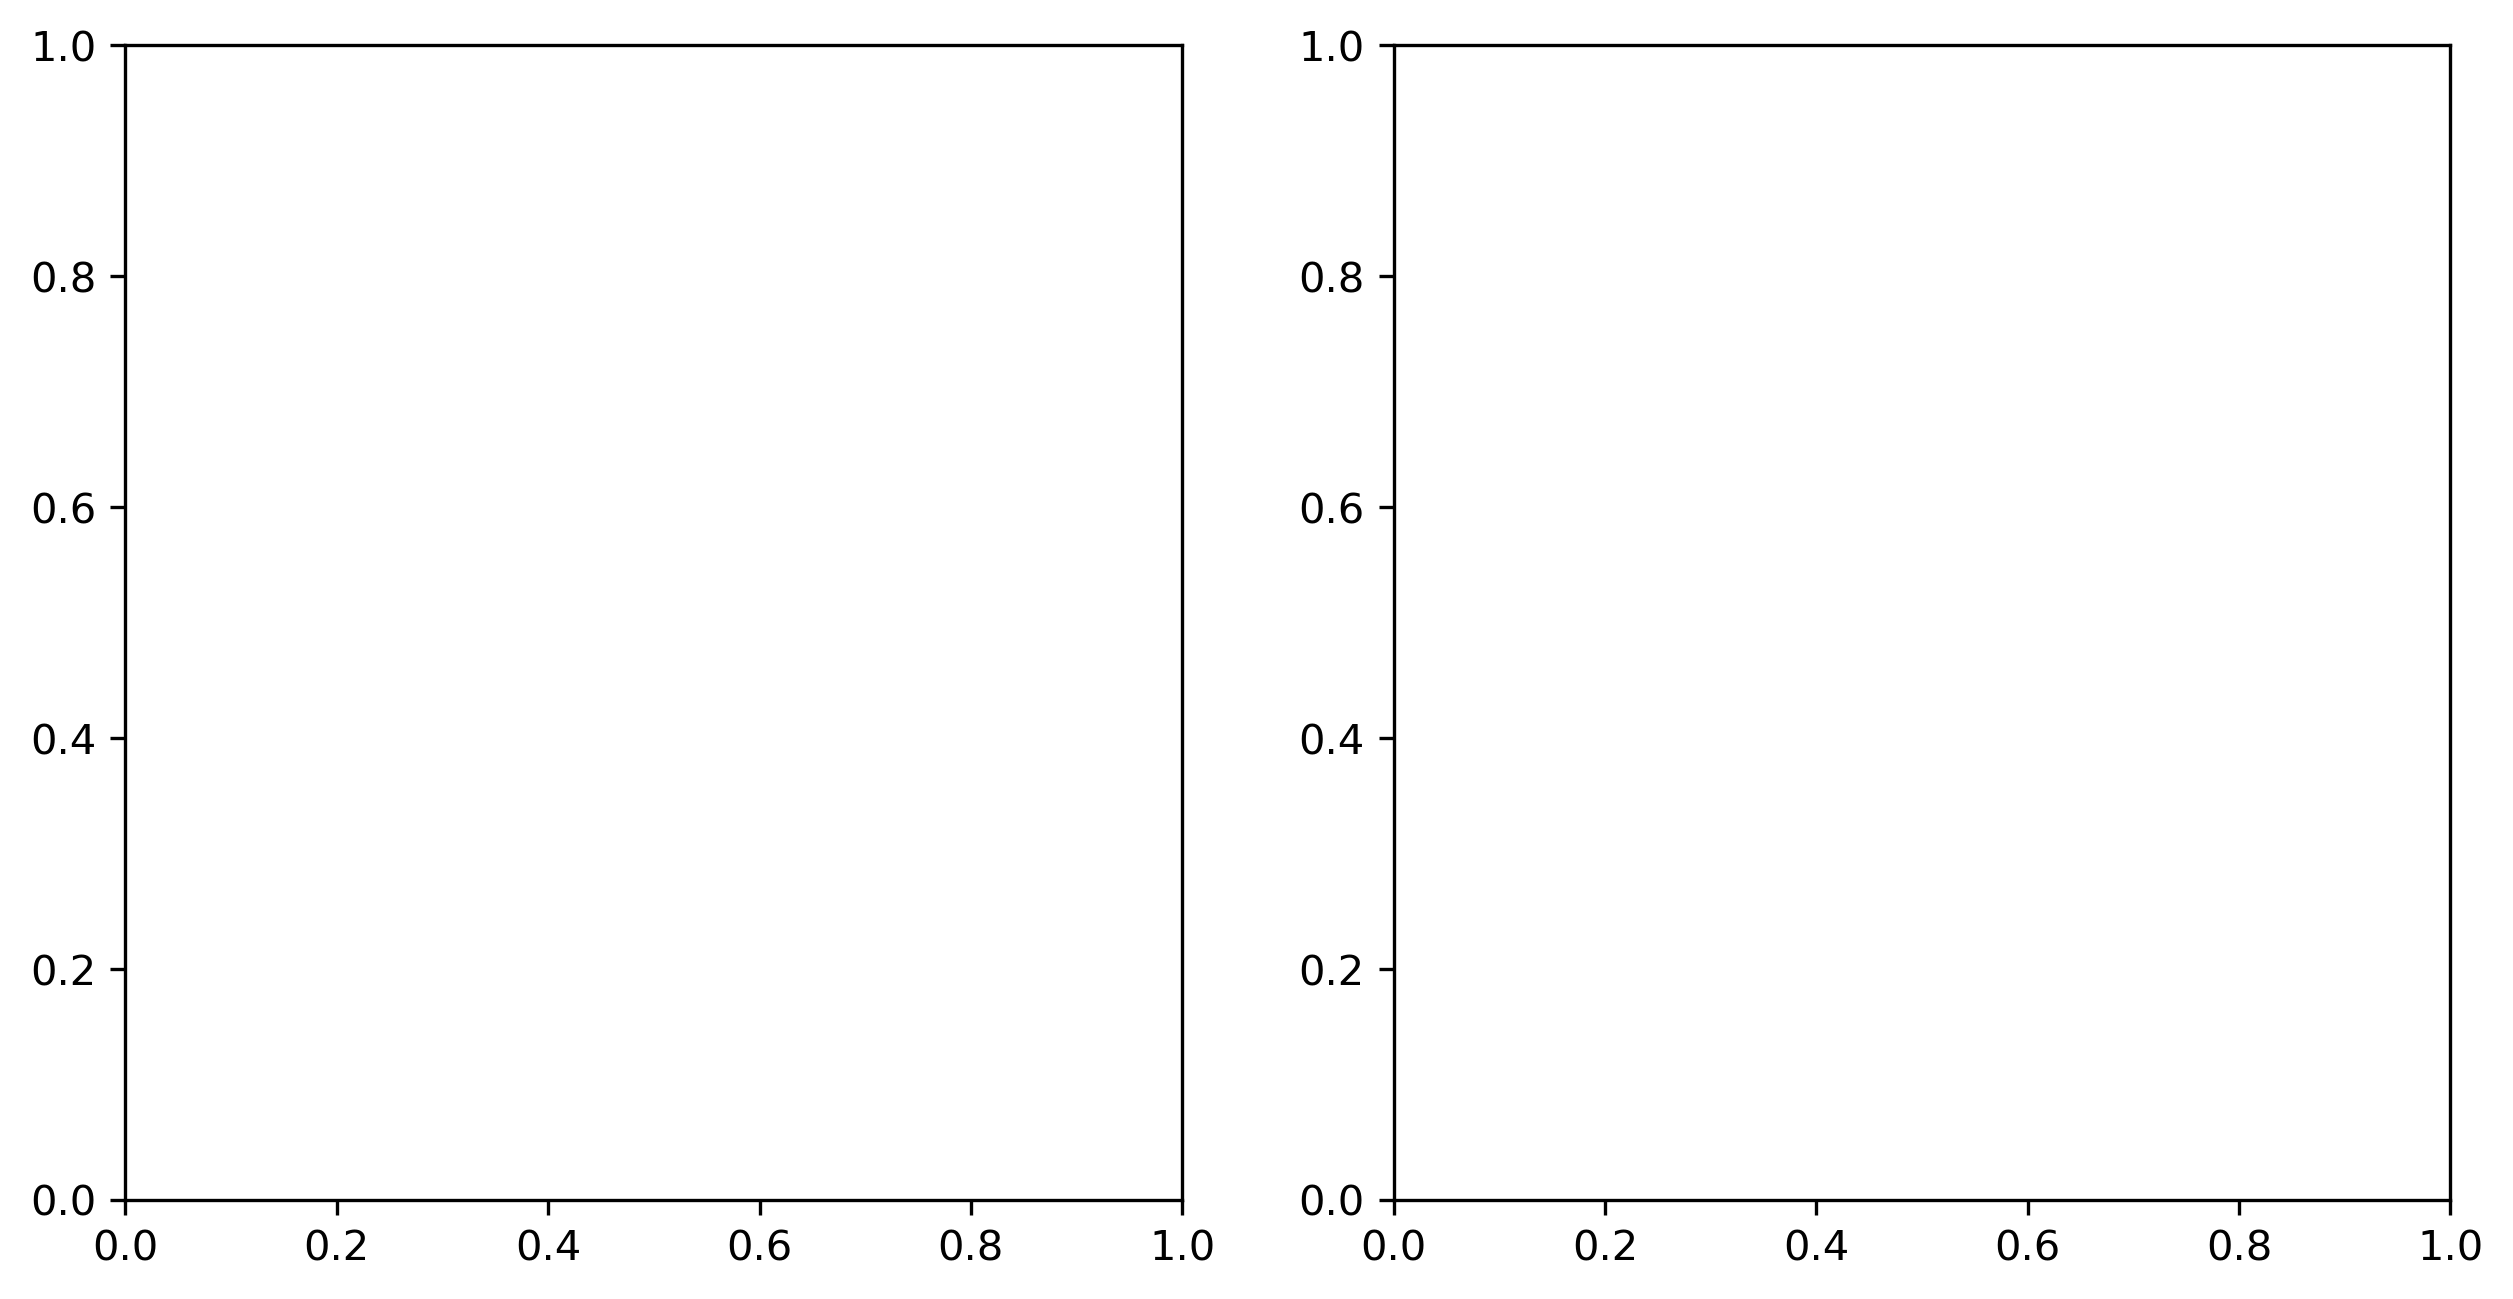

In [16]:
evals, evecs_l, evecs_r = eig(weight_mat, left=True, right=True)

fig, ax = plt.subplots(1, 2, figsize=(10, 5), dpi=300)

for k in np.arange(45, 50, 1):

    circular_mat = get_circular_mat(N, 10, k=k)
    asym_weight_mat = weight_mat - circular_mat
    asym_eigvals, asym_evecs_l, asym_evecs_r = eig(asym_weight_mat, left=True, right=True)

    M = 10
    
    ax[0].plot(np.abs(asym_eigvals)[:M], 'ro')
    ax[0].plot(np.abs(evals)[:M], 'ko')
    ax[0].legend(['asym', 'original'])

    ax[1].plot(np.abs(asym_eigvals)[:M] / np.abs(evals)[:M], 'o-', label=f'k={k}')
    #add the label beside the line
    #ax[1].text(1.1*M, np.abs(asym_eigvals)[M-1] / np.abs(evals)[M-1], f'k={k}')
    #ylabel \lambda_{pertub}}/{\lambda_{orig}$
    ax[1].set_ylabel(r'$\lambda_{pertub} / \lambda_{orig}$')

#ax[1] y=1 line
ax[1].plot([0, M], [1, 1], 'k--')

ax[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

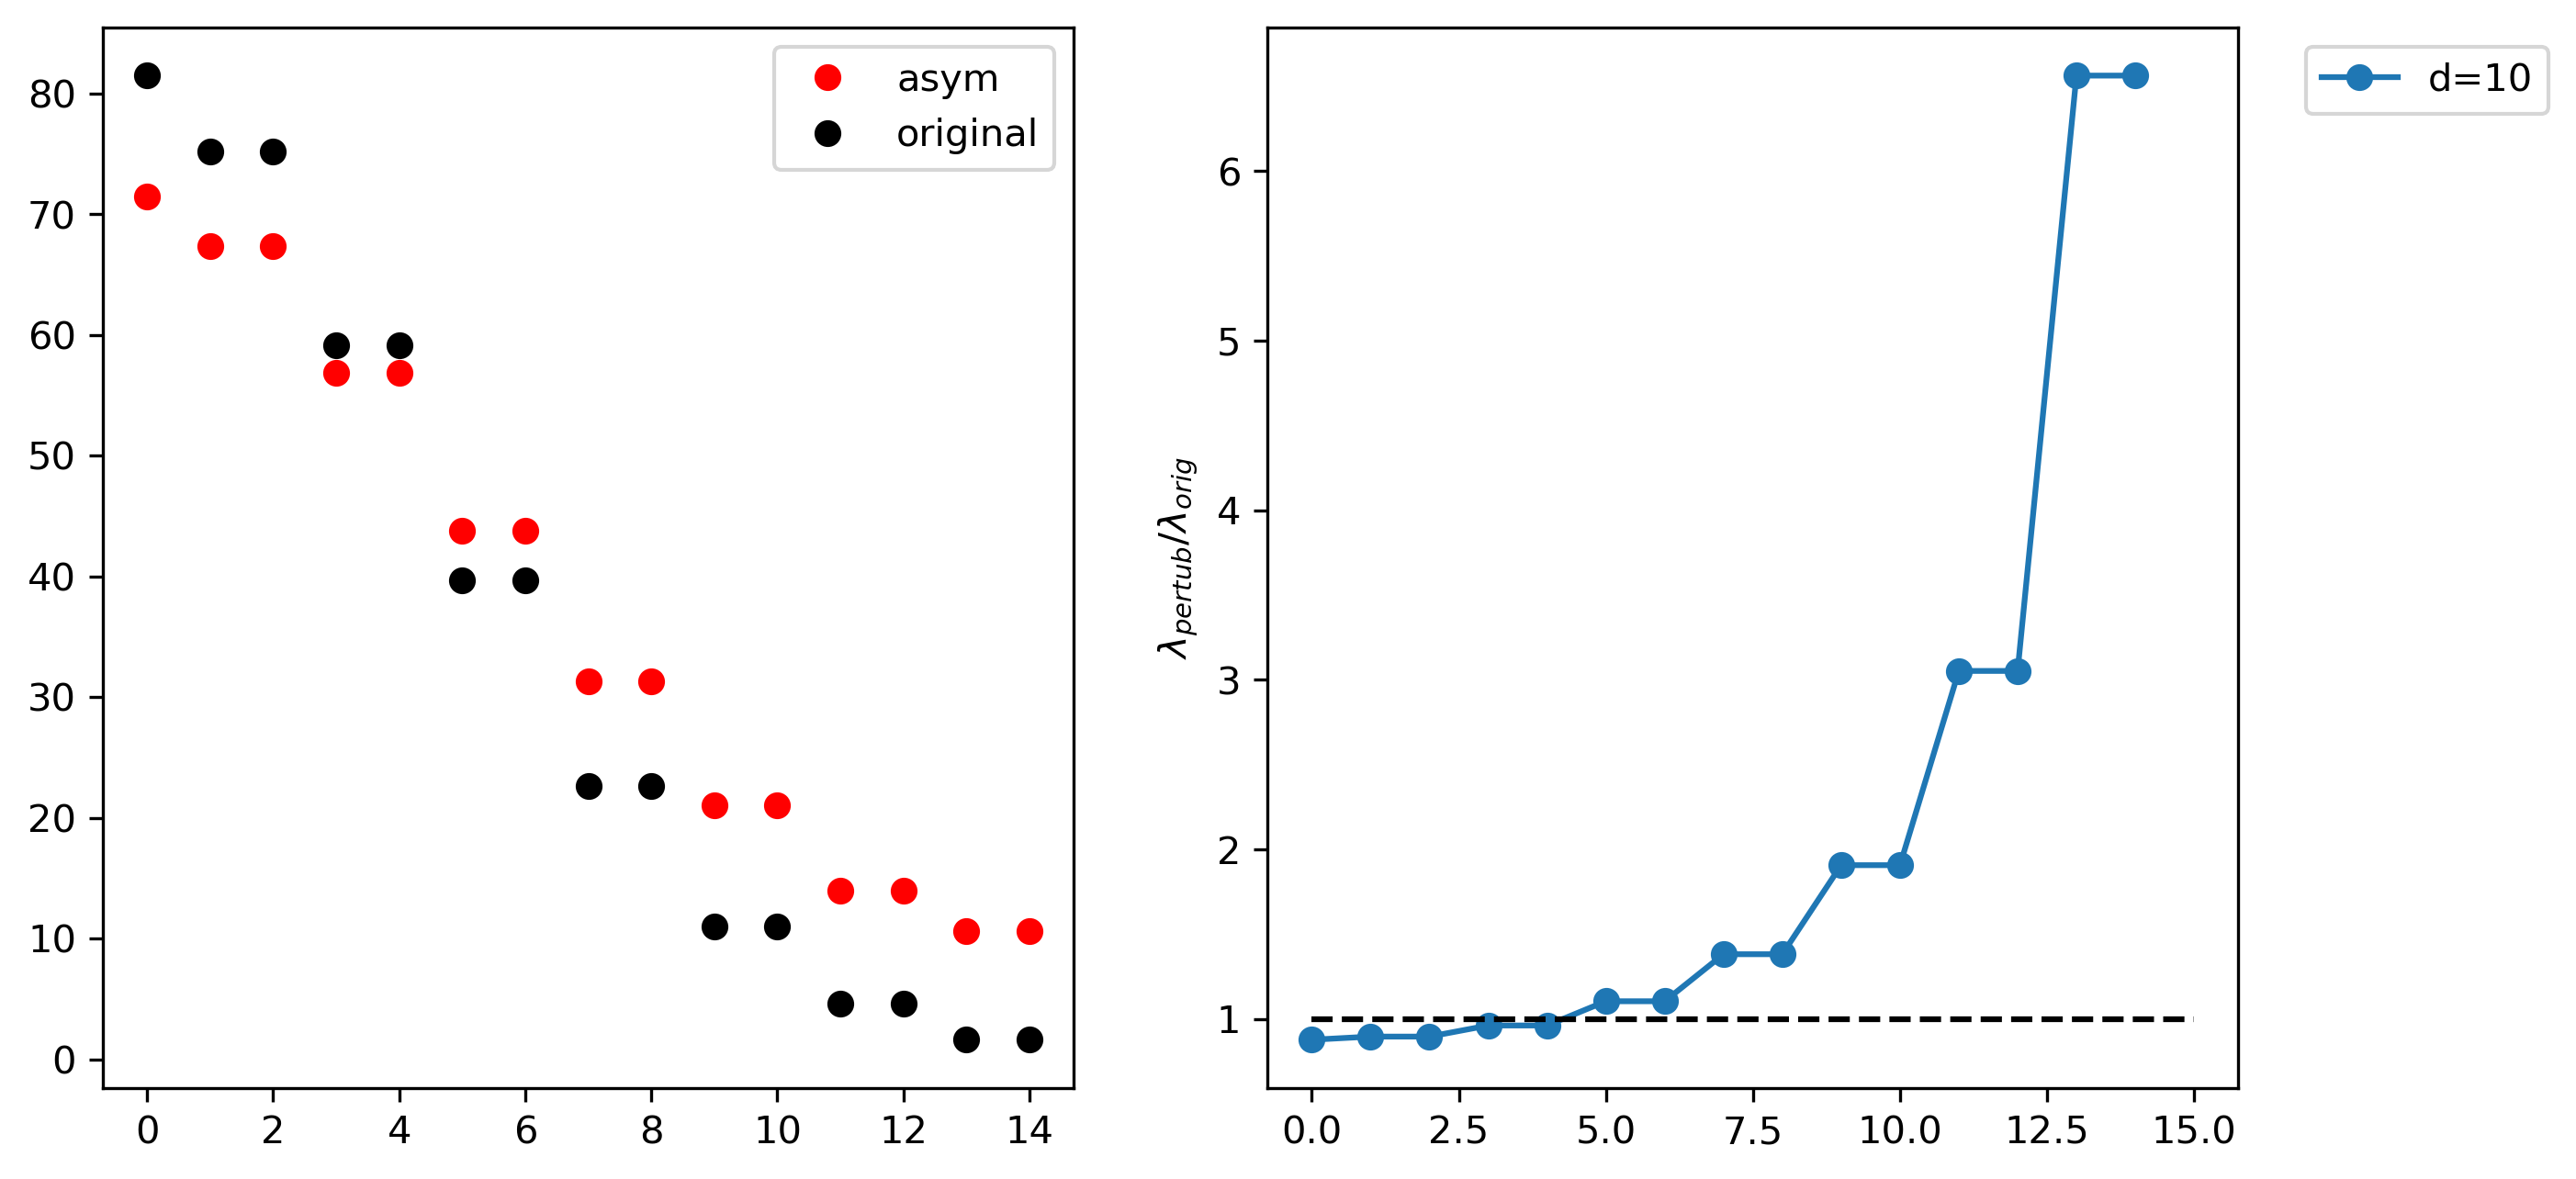

In [31]:
M = 15 #truncate the largest top M eigenvalues to plot
epsilon = 10 #perturbation strength
pertub_offset = 10 #perturbation offset

evals, evecs_l, evecs_r = eig(weight_mat, left=True, right=True)

fig, ax = plt.subplots(1, 2, figsize=(10, 5), dpi=300)

for k in np.arange(10, 25, 50):

    circular_mat = get_circular_mat(N, epsilon, offset=k)
    asym_weight_mat = weight_mat - circular_mat
    asym_eigvals, asym_evecs_l, asym_evecs_r = eig(asym_weight_mat, left=True, right=True)
    
    ax[0].plot(np.abs(asym_eigvals)[:M], 'ro')
    ax[0].plot(np.abs(evals)[:M], 'ko')
    ax[0].legend(['asym', 'original'])

    ax[1].plot(np.abs(asym_eigvals)[:M] / np.abs(evals)[:M], 'o-', label=f'd={k}')
    #add the label beside the line
    #ax[1].text(1.1*M, np.abs(asym_eigvals)[M-1] / np.abs(evals)[M-1], f'k={k}')
    #ylabel \lambda_{pertub}}/{\lambda_{orig}$
    ax[1].set_ylabel(r'$\lambda_{pertub} / \lambda_{orig}$')

#ax[1] y=1 line
ax[1].plot([0, M], [1, 1], 'k--')

ax[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

In [33]:
np.abs(evals)

array([8.14873281e+01, 7.52222860e+01, 7.52222832e+01, 5.91719485e+01,
       5.91719412e+01, 3.96641416e+01, 3.96641398e+01, 2.26565193e+01,
       2.26565135e+01, 1.10281093e+01, 1.10281112e+01, 4.57427124e+00,
       4.57427203e+00, 1.61679735e+00, 1.61679850e+00, 4.86970271e-01,
       4.86970776e-01, 1.24986314e-01, 1.24986931e-01, 2.73361680e-02,
       2.73366670e-02, 5.09488581e-03, 5.09522082e-03, 8.09313254e-04,
       8.09183717e-04, 1.09202670e-04, 1.09407815e-04, 1.21864534e-05,
       1.20452603e-05, 3.51263644e-06, 2.76984261e-06, 1.67066273e-06,
       1.30962275e-06, 1.40783055e-06, 1.34579530e-06, 1.21326678e-06,
       1.14160738e-06, 1.21464898e-06, 1.20011736e-06, 1.11889260e-06,
       9.80831793e-07, 1.01791507e-06, 1.07670728e-06, 1.04794427e-06,
       1.03121317e-06, 1.00106702e-06, 8.93453720e-07, 8.56181578e-07,
       8.37791736e-07, 7.89255314e-07, 8.05851059e-07, 9.19818097e-07,
       8.52533505e-07, 8.36471793e-07, 6.92040400e-07, 6.45030722e-07,
      